In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-product-review-data/electronics_reviews_uniq.json
/kaggle/input/ecommerce-product-review-data/Product Review Data.csv
/kaggle/input/ecommerce-product-review-data/Automotive_5.json
/kaggle/input/ecommerce-product-review-data/Product Review Large Data.csv
/kaggle/input/ecommerce-product-review-data/Flipkart_Reviews - Electronics.csv


In [2]:
#importing libraries

import string
import re
import spacy
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

#genism
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import CoherenceModel
from gensim.models import LsiModel

In [ ]:
pip install pyLDAvis

In [3]:
#reading data
dataset =pd.read_csv(r"/kaggle/input/ecommerce-product-review-data/Product Review Large Data.csv")
dataset.sample(10)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
10766,ACCEVQZABYWJHRHF,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,It's a good product. Has a decent bass and sup...,Must buy!,NaN,NaN,NaN,NaN,NaN,NaN
350,AVpfLiCSilAPnD_xWpk_,B00CX5P8FC,Amazon,"Categories,Amazon Devices,Electronics Features...",NaN,2015-05-22T18:12:20Z,2017-08-08T22:03:26Z,NaN,8.490000e+11,"848719022827,0848719022827,amazonfiretv/b00cx5...",...,NaN,http://www.amazon.com/Fire-TV-streaming-media-...,This was easy to set up I can access many movi...,Amazon Fire TV - A must have!!!!,NaN,NaN,Amazon Customer,NaN,8.490000e+11,NaN
6793,ACCFVWN4PGNTEFGY,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,Worth the price. A very good budget earpods,Excellent,NaN,NaN,NaN,NaN,NaN,NaN
156,AV00l7jV-jtxr-f30lnX,B01LW1MS9C,Amazon,Amazon Devices,NaN,2017-07-12T02:19:04Z,2017-08-13T08:29:10Z,NaN,NaN,amazonechodotcasefitsechodot2ndgenerationonlys...,...,5.0,https://www.amazon.com/Amazon-Echo-Case-fits-G...,A great looking cover for the Echo Dot. It giv...,Great look for Dot.,NaN,NaN,C. Morrow,NaN,NaN,NaN
3889,ACCFR3Q77R6RRGAC,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,Best earphones in the market if you already ow...,Great product,NaN,NaN,NaN,NaN,NaN,NaN
9463,ACCFSDGXX3S6DVBG,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,Loved the product and superfast delievery !!,Wonderful,NaN,NaN,NaN,NaN,NaN,NaN
6124,ACCFVA3KZ2EYMYX3,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,Amazing sounds quality and Bass super product ...,Worth every penny,NaN,NaN,NaN,NaN,NaN,NaN
7063,ACCFVWN4PGNTEFGY,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,Very good,Excellent,NaN,NaN,NaN,NaN,NaN,NaN
8345,ACCFSKBJYWZKXGCP,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,good saund,Just wow!,NaN,NaN,NaN,NaN,NaN,NaN
4220,ACCFR3Q77R6RRGAC,NaN,Flipkart,"Flipkart Headphone, Devices & Accessories, Blu...",NaN,2019-07-02T14:40:43Z,2020-08-33T08:28:46Z,NaN,NaN,NaN,...,5.0,NaN,Extreamly gooooddd. Gr8 audio. And battery li...,Fabulous!,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(10971, 27)

In [5]:
dataset['reviews.text']=dataset['reviews.text'].fillna('Missing')

In [6]:
dataset['reviews.rating'].value_counts()

5.0    6136
4.0    2195
1.0    1132
3.0     746
2.0     342
Name: reviews.rating, dtype: int64

In [7]:
def sentiment(row):    
    if row['reviews.rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews.rating'] == 1.0 or row['reviews.rating'] == 2.0:
        val = 'Negative'
    elif row['reviews.rating'] == 4.0 or row['reviews.rating'] == 5.0:
        val = 'Positive'
    else:
        val = '-1'
    return val

In [8]:
dataset['sentiment'] = dataset.apply(sentiment, axis=1)
dataset.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,sentiment
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,Positive
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,Positive
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,Positive
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,Positive
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,Positive


In [9]:
dataset['sentiment'].value_counts()

Positive    8331
Negative    1474
Neutral      746
-1           420
Name: sentiment, dtype: int64

In [10]:
dataset['reviews.numHelpful'].value_counts()

0.0      504
2.0       23
3.0       18
1.0       16
5.0       15
        ... 
834.0      1
323.0      1
102.0      1
790.0      1
136.0      1
Name: reviews.numHelpful, Length: 182, dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder() 
dataset['sentiment']= label_encoder.fit_transform(dataset['sentiment']) 
dataset['sentiment'].unique()

array([3, 0, 2, 1])

In [12]:
dataset['sentiment'].value_counts()

3    8331
1    1474
2     746
0     420
Name: sentiment, dtype: int64

In [13]:
review_features=dataset.copy()
review_features=dataset[['reviews.text']].reset_index(drop=True)
review_features.head()

,reviews.text
0,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...
3,I bought one of the first Paperwhites and have...
4,I have to say upfront - I don't like coroporat...


In [14]:
def sent_to_words(sentences, deacc=True):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  

data = dataset['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[5])

['my', 'previous', 'kindle', 'was', 'dx', 'this', 'is', 'my', 'second', 'kindle', 'in', 'years', 'love', 'the', 'form', 'factor', 'and', 'all', 'but', 'do', 'miss', 'the', 'physical', 'buttons', 'for', 'page', 'turning', 'there', 'is', 'glitch', 'in', 'the', 'software', 'though', 'use', 'the', 'english', 'interface', 'but', 'occasionally', 'would', 'like', 'to', 'translate', 'words', 'into', 'traditional', 'chinese', 'however', 'it', 'seems', 'that', 'the', 'traditional', 'chinese', 'characters', 'cannot', 'display', 'correctly', 'and', 'become', 'small', 'boxes', 'the', 'simplified', 'chinese', 'characters', 'can', 'be', 'displayed', 'correctly', 'though']


In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + list(string.punctuation)

In [17]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews.text'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)
    
corpus[3]

'i bought one first paperwhit pleas constant companion i suppos ive read averag book everi three day past howev mani year i wouldnt give youd pri cold dead finger for sundri logist reason ive also made good use amazon kindl app iphon no paperwhit screen natur cool usabl deliv work well attract companion kindl of cours aspect paperwhit i would like critiqu ah knew come somewher didnt as member bookbub i get daili list alert book deal chosen genr i take mani howev ive found even best world i cant keep some day seem everi book i read ive bought two there much good stuff the accumul effect number book actual paperwhit creep ever upward time it with mind ive notic page turn remain exactli everi action kindl becom posit glacial not slow slow think malfunct the gener consensu appear expect one mani book download onto kindl begin behav flakey manner thi drive mad amazon state hold thousand book i believ but i figur i would need second paperwhit read im wait action complet first one read'

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(review_features['reviews.text'])

In [19]:
X.shape

(10971, 5000)

In [20]:
y=dataset['sentiment']

In [21]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [23]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Test Accuracy: 0.8202650713238457
Decision Tree Test Accuracy: 0.7888291133460521
KNN Test Accuracy: 0.7490729809565083
SVC Test Accuracy: 0.8272830521392173
Naive Bayes Test Accuracy: 0.608617308672601


In [24]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.8531988956907934


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


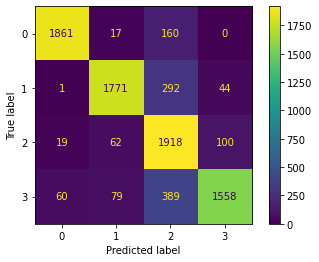

In [26]:
plot_confusion_matrix(clf, X_test, y_test) 

In [37]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def data_lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [39]:
data_words_nostops = remove_stopwords(data_words)
nlp = spacy.load( 'en_core_web_sm',disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ'])
print(data_lemmatized[5])

['previous', 'kindle', 'dx', 'kindle', 'year', 'form', 'factor', 'physical', 'button', 'page', 'glitch', 'software', 'english', 'interface', 'translate', 'word', 'traditional', 'traditional', 'chinese', 'character', 'small', 'box', 'chinese', 'character']


In [40]:
print(' '.join(data_words[3]), '\n')

bought one of the first paperwhites and have been very pleased with it its been constant companion and suppose ive read on average book every three days for the past however many years on it wouldnt give it up youd have to pry it from my cold dead fingers for sundry logistical reasons ive also made good use of amazons kindle app on my iphone no paperwhite screen naturally and all the cool usability that delivers but it works well and has its own attractions as companion to the kindle of course there are aspects of the paperwhite which would like to critique ah you knew that was coming somewhere didnt you as member of bookbub get daily list of alerts and book deals in my chosen genres take on many of them however ive found that even with the best will in the world cant keep up some days it seems that for every book read ive bought two theres just so much good stuff out there the accumulative effect of this is that the number of books actually on my paperwhite has been creeping ever upwa

In [41]:
print(' '.join(data_lemmatized[3]))

first paperwhite constant companion average book day many year d cold dead finger sundry logistical reason good use amazon kindle iphone paperwhite screen cool usability deliver well attraction course paperwhite critique member bookbub daily list alert book deal genre many good world day book good stuff accumulative effect number book upward time mind page turning action kindle glacial slow slow general consensus many book kindle begin mad amazon state thousand book figure second paperwhite read action first read


In [42]:
id2word = corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized]
print(corpus[3])

[(1, 2), (8, 2), (25, 1), (26, 4), (35, 1), (43, 1), (46, 1), (53, 6), (76, 3), (80, 3), (99, 1), (100, 1), (104, 1), (105, 2), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 1), (114, 1), (115, 1), (116, 1), (117, 1), (118, 1), (119, 1), (120, 1), (121, 1), (122, 1), (123, 1), (124, 1), (125, 1), (126, 2), (127, 1), (128, 1), (129, 1), (130, 3), (131, 1), (132, 1), (133, 1), (134, 1), (135, 1), (136, 1), (137, 1), (138, 2), (139, 1), (140, 1), (141, 2), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1)]


In [43]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adjustment', 1),
  ('amazon', 1),
  ('auto', 1),
  ('basis', 1),
  ('case', 1),
  ('certain', 1),
  ('change', 1),
  ('custom', 1),
  ('day', 2),
  ('delivery', 1),
  ('easy', 1),
  ('expense', 1),
  ('extra', 1),
  ('fine', 1),
  ('friend', 1),
  ('glad', 1),
  ('great', 1),
  ('hard', 1),
  ('international', 1),
  ('level', 1),
  ('light', 3),
  ('model', 1),
  ('money', 1),
  ('need', 1),
  ('option', 1),
  ('page', 1),
  ('paperwhite', 3),
  ('party', 1),
  ('press', 1),
  ('pricey', 1),
  ('reading', 1),
  ('receptive', 1),
  ('regardless', 1),
  ('regret', 1),
  ('review', 1),
  ('screen', 1),
  ('service', 1),
  ('setting', 2),
  ('shipping', 2),
  ('specific', 2),
  ('spending', 1),
  ('thing', 1),
  ('third', 1),
  ('time', 3),
  ('tracking', 1),
  ('trouble', 1),
  ('use', 1),
  ('voyage', 3),
  ('week', 1),
  ('worry', 1)]]

In [44]:
for i in range(5,15):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=100,
                                           alpha=0.1,
                                           per_word_topics=True)
    model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    score = model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, score))

Coherence score with 5 clusters: 0.6056090350391197
Coherence score with 6 clusters: 0.5390645293736457


KeyboardInterrupt: 

In [45]:
for i in range(5,15):
    lsi = LsiModel(corpus, num_topics=i, id2word=id2word)
    coherence_model = CoherenceModel(model=lsi, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

Coherence score with 5 clusters: 0.5603040311992394
Coherence score with 6 clusters: 0.6213636324501725
Coherence score with 7 clusters: 0.5583922432992096
Coherence score with 8 clusters: 0.5019552564516111
Coherence score with 9 clusters: 0.5054150367301317
Coherence score with 10 clusters: 0.47995722048768713
Coherence score with 11 clusters: 0.47503628412351717
Coherence score with 12 clusters: 0.46666899418384017
Coherence score with 13 clusters: 0.4564690787308031
Coherence score with 14 clusters: 0.5039051125061448


In [ ]:
from keras.models import Sequential
from keras import layers 

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(dataset).todense()
vectors.shape

In [ ]:
vocab = np.array(vectorizer.get_feature_names())
# vocab.shape
vocab_size=vocab.size

In [ ]:
embedding_dim = 200
maxlen=100
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Dense(10, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='softmax'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary()

In [ ]:
Xcnn=X.toarray()

In [ ]:
textcnnmodel.fit(Xcnn, y,
                     epochs=5,
                     verbose=False,
                     validation_data=(X_test,y_test ),
                     batch_size=10)
loss, accuracy = textcnnmodel.evaluate(Xcnn, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, X_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))